In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in all the validation_results.log files from the different experiments
dropout_0 = pd.read_csv('./dropout_0/validation_results.log')
dropout_0p1 = pd.read_csv('./dropout_0p1/validation_results.log')
dropout_0p2 = pd.read_csv('./dropout_0p2/validation_results.log')

In [3]:
def ema_smooth(x, alpha=0.2):
    smoothed = []
    last = x[0]
    for v in x:
        last = alpha * v + (1 - alpha) * last
        smoothed.append(last)
    return smoothed

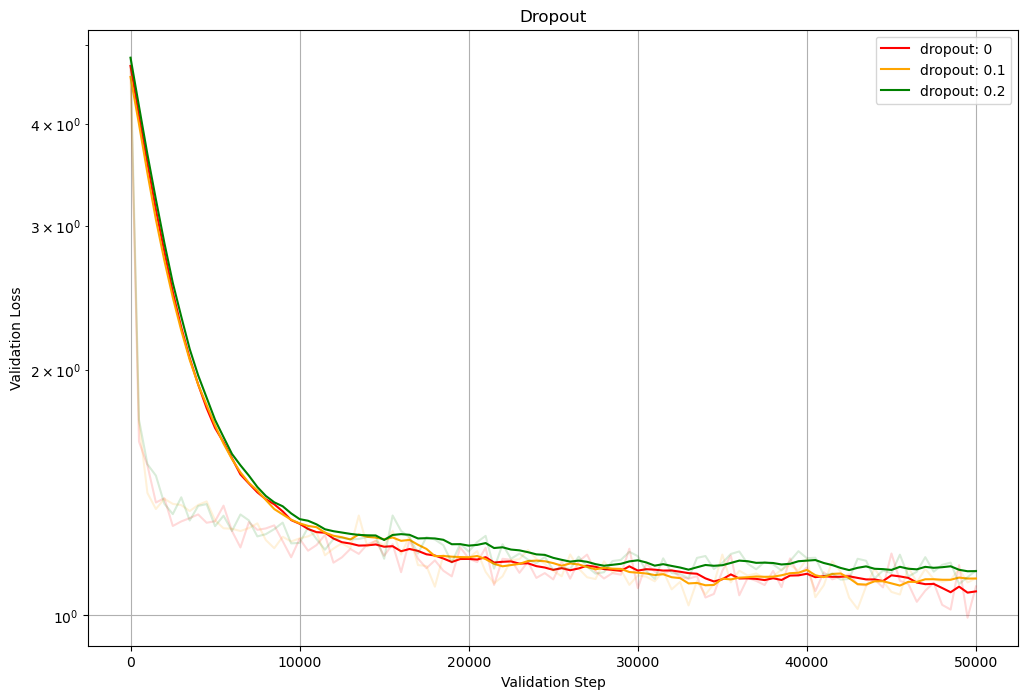

In [4]:
# Plotting all the validation loss curves for comparison
# Use vaLidation step as x-axis and validation loss as y-axis
plt.figure(figsize=(12, 8))

plt.plot(dropout_0['step'], dropout_0[' val_loss'], alpha=0.15, color='red')
plt.plot(dropout_0['step'], ema_smooth(dropout_0[' val_loss']), label='dropout: 0', color='red')

plt.plot(dropout_0p1['step'], dropout_0p1[' val_loss'], alpha=0.15, color='orange')
plt.plot(dropout_0p1['step'], ema_smooth(dropout_0p1[' val_loss']), label='dropout: 0.1', color='orange')

plt.plot(dropout_0p2['step'], dropout_0p2[' val_loss'], alpha=0.15, color='green')
plt.plot(dropout_0p2['step'], ema_smooth(dropout_0p2[' val_loss']), label='dropout: 0.2', color='green')
plt.yscale('log')
plt.xlabel('Validation Step')
plt.ylabel('Validation Loss')
plt.title('Dropout')
plt.legend()
plt.grid()
plt.savefig('dropout.jpg')
plt.show()

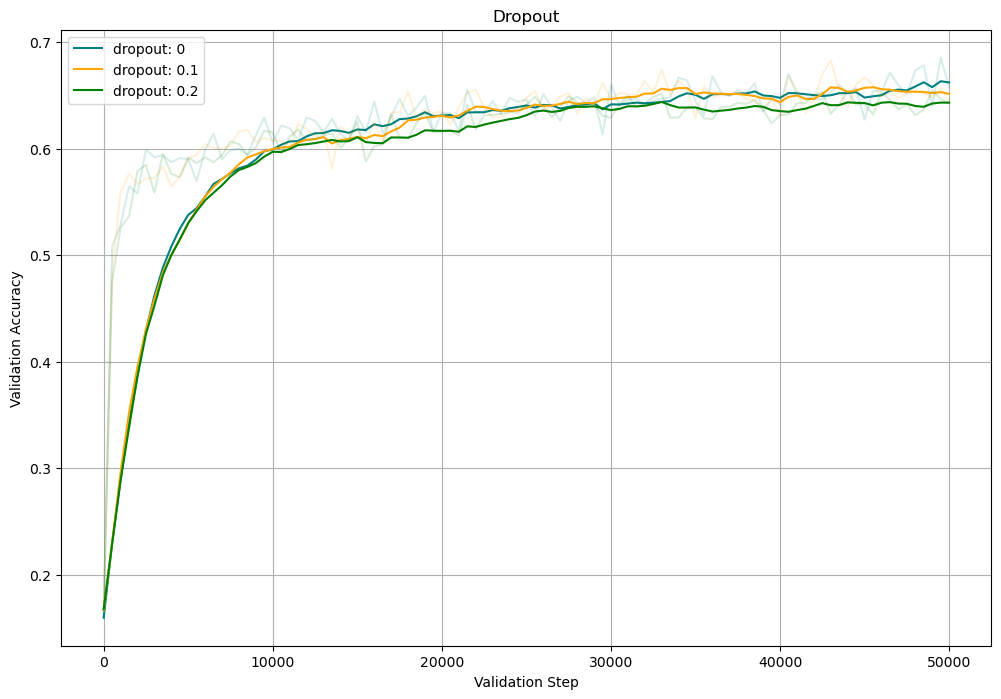

In [5]:
# Plotting all the validation accuracy curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(dropout_0['step'], dropout_0[' val_acc'], alpha=0.15, color='teal')
plt.plot(dropout_0['step'], ema_smooth(dropout_0[' val_acc']), label='dropout: 0', color='teal')

plt.plot(dropout_0p1['step'], dropout_0p1[' val_acc'], alpha=0.15, color='orange')
plt.plot(dropout_0p1['step'], ema_smooth(dropout_0p1[' val_acc']), label='dropout: 0.1', color='orange')

plt.plot(dropout_0p2['step'], dropout_0p2[' val_acc'], alpha=0.15, color='green')
plt.plot(dropout_0p2['step'], ema_smooth(dropout_0p2[' val_acc']), label='dropout: 0.2', color='green')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy')
plt.title('Dropout')
plt.legend()
plt.grid()
plt.show()

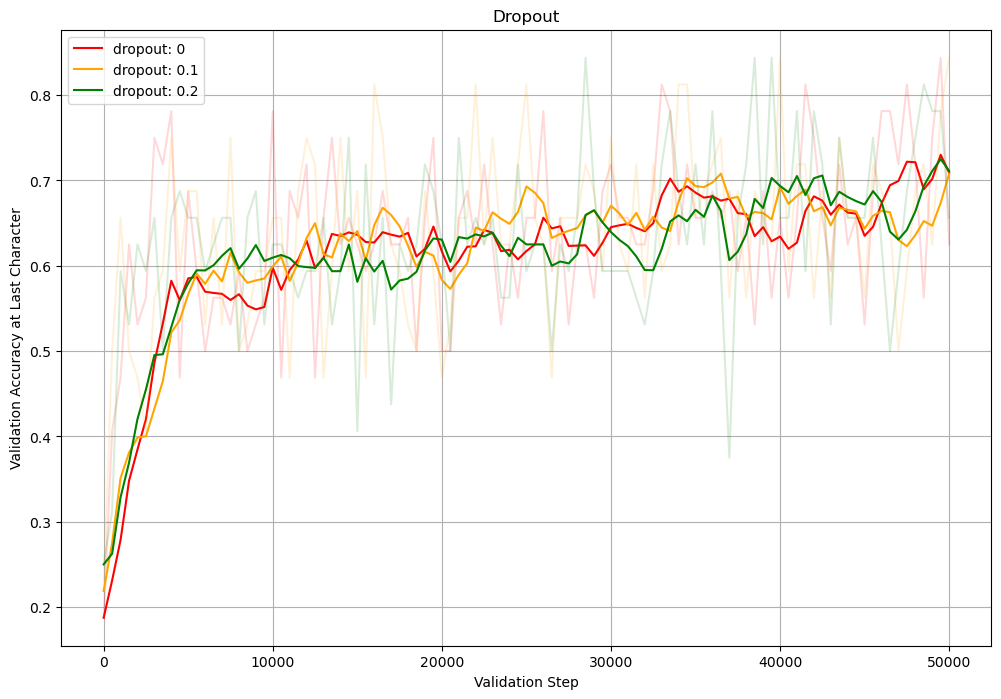

In [6]:
# Plotting all the validation accuracy at the last character curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(dropout_0['step'], dropout_0[' last_char_val_acc'], alpha=0.15, color='red')
plt.plot(dropout_0['step'], ema_smooth(dropout_0[' last_char_val_acc']), label='dropout: 0', color='red')

plt.plot(dropout_0p1['step'], dropout_0p1[' last_char_val_acc'], alpha=0.15, color='orange')
plt.plot(dropout_0p1['step'], ema_smooth(dropout_0p1[' last_char_val_acc']), label='dropout: 0.1', color='orange')

plt.plot(dropout_0p2['step'], dropout_0p2[' last_char_val_acc'], alpha=0.15, color='green')
plt.plot(dropout_0p2['step'], ema_smooth(dropout_0p2[' last_char_val_acc']), label='dropout: 0.2', color='green')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy at Last Character')
plt.title('Dropout')
plt.legend()
plt.grid()
plt.show()